In [166]:
# We want to make a GP that predicts temperature with social variables
import numpy as np
import os
import requests
import scipy.io
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import matplotlib.pyplot as plt

mld = os.path.join("C:\\Users\\theod\\Desktop\\UCL\\Machine Learning\\Project\\socio_climate_model\\external_data")


In [167]:
data = np.genfromtxt(os.path.join(mld, "cdiac_fossilfuel.csv"), delimiter=",")

In [229]:
carbon_func = interp1d(data[2:, 0]-1800, data[2:, 1]*10**(-3), kind="cubic")
print(min(data[51:, 0]), max(data[51:, 0]))

1800.0 2014.0


9.855


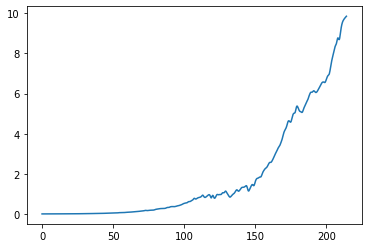

In [242]:
t = np.linspace(0, 214, 1000)
plt.plot(t, carbon_func(t))
epsilon2014 = carbon_func(214)
print(epsilon2014)

In [170]:
# # constants
# Cat0 = (590, 569, 602)          # GtC initial CO2 in atmosphere
# Cao0 = (1.4, 1.5, 1.6)          # GtC initial CO2 in ocean reservoir
# Cveg0 = (540, 550, 560)         # GtC initial CO2 in vegetation reservoir
# Cso0 = (1480, 1500, 1520)       # GtC initial CO2 in soil reservoir
# T0 = (288, 288.15, 288.3)       # K initial average atmospheric temperature
# kp = (0.175, 0.184, 0.193)      # yr-1 photosynthesis rate constant
# kMM = 1.478                     # photosynthesis normalising constant
# kc = (26, 29, 32) * 1e-6        # half-saturation point for photosynthesi
# KM = (108, 120, 132) * 1e-6     # photosynthesis compensation point
# ka = 1.773 * 1e-20              # mole volume of atmosphere 
# kr = (0.0828, 0.092, 0.1012)    # yr-1 plant respiration constant
# kA = 8.7039 * 1e9               # plant respiration normalising constant 
# Ea = (54.63, 54.83, 55.03)      # J mol−1 plant respiration activation energy
# ksr =  (0.0303, 0.034, 0.037)   # yr−1 soil respiration rate constant
# kB = 157.072                    #soil respiration normalising constant  
# kt = (0.0828, 0.092, 0.1012)    # yr−1 turnover rate constant  
# c = (4.22, 4.69, 5.16) * 1e23   # JK−1 specific heat capacity of Earth’s surface
# aE = 5.101 *1e14                #  m2 Earth’s surface area
# sigma = 5.67 * 1e-8             # Wm−2 K−4 Stefan-Boltzman constant
# L = 43655                       #  mol−1 latent heat per mole of water  
# R = 8.314                       # J mol−1 K molar gas constant
# H = 0.5915                      # relative humidity  
# A = (0.203, 0.225, 0.248)       # yr−1 surface albedo
# S = (1231, 1368, 1504)          # Wm−2 solar flux 
# tauCH4= (0.0208, 0.0231, 0.0254)# methane opacity 
# P0  = (1.26, 1.4, 1.54) * 1e11  # Pa water vapor saturation constant  
# F0 = (2.25, 2.5, 2.75) * 1e-2   # yr−1  ocean flux rate constant  
# chi = (0.2, 0.3, 0.4)           # characteristic CO2 solubility 
# zeta = (40, 50, 60)             # evasion factor
# kappa = (0.02, 0.05, 0.2)       # yr−1 social learning rate 
# beta = (0.5, 1, 1.5)            # net cost of mitigation 
# delta = (0.5, 1, 1.5)           # strength of social norms
# fmax  = (4,5,6)                 # maximum of warming cost function f(T) 
# omega = (1, 3, 5)               # K nonlinearity of warming cost function f(T)  
# Tc = (2.4, 2.5, 2.6)            # K critical temperature of f(T)  
# tp = 10                         # yr previous years used for temperature projection  
# tf = (0, 25, 50)                # yr years ahead for temperature projection
# s = (30, 50, 70)                # yr half-saturation time for epsilon(t) from 2014
# epsilon_max = (4.2, 7, 9.8)     # GtC yr−1  maximum change in epsilon(t) from 2014
# x0 = (0.01, 0.05, 0.1)          # initial proportion of mitigators 

In [320]:
# constants
Cat0 = (590, 569, 602)          # GtC initial CO2 in atmosphere
Coc0 = (1.4e5, 1.5e5, 1.6e5)          # GtC initial CO2 in ocean reservoir
Cveg0 = (540, 550, 560)         # GtC initial CO2 in vegetation reservoir
Cso0 = (1480, 1500, 1520)       # GtC initial CO2 in soil reservoir
T0 = (288, 288.15, 288.3)       # K initial average atmospheric temperature
kp = (0.175, 0.184, 0.193)      # yr-1 photosynthesis rate constant
kMM = 1.478                     # photosynthesis normalising constant
kc = (26* 1e-6, 29* 1e-6, 32* 1e-6)         # half-saturation point for photosynthesi
KM = (108* 1e-6, 120* 1e-6, 132* 1e-6)      # photosynthesis compensation point
ka = 1.773 * 1e20              # mole volume of atmosphere 
kr = (0.0828, 0.092, 0.1012)    # yr-1 plant respiration constant
kA = 8.7039 * 1e9               # plant respiration normalising constant 
Ea = (54.63e3, 54.83e3, 55.03e3)      # J mol−1 plant respiration activation energy
ksr =  (0.0303, 0.0337, 0.0371)   # yr−1 soil respiration rate constant
kB = 157.072                    #soil respiration normalising constant  
kt = (0.0828, 0.092, 0.1012)    # yr−1 turnover rate constant  
c = (4.22* 1e23, 4.69* 1e23, 5.16* 1e23)    # JK−1 specific heat capacity of Earth’s surface
aE = 5.101 *1e14                #  m2 Earth’s surface area
sigma = 5.67 * 1e-8             # Wm−2 K−4 Stefan-Boltzman constant
L_ = 43655                      #  mol−1 latent heat per mole of water  
R = 8.314                       # J mol−1 K molar gas constant
H = 0.5915                      # relative humidity  
A = (0.203, 0.225, 0.248)       # yr−1 surface albedo
S = (1231, 1368, 1504)          # Wm−2 solar flux 
tauCH4= (0.0208, 0.0231, 0.0254)# methane opacity 
P0  = (1.26* 1e11, 1.4* 1e11, 1.54* 1e11)   # Pa water vapor saturation constant  
F0 = (2.25* 1e-2, 2.5* 1e-2, 2.75* 1e-2)    # yr−1  ocean flux rate constant  
chi = (0.2, 0.3, 0.4)           # characteristic CO2 solubility 
zeta = (40, 50, 60)             # evasion factor
kappa = (0.02, 0.05, 0.2)       # yr−1 social learning rate 
beta = (0.5, 1, 1.5)            # net cost of mitigation 
delta = (0.5, 1, 1.5)           # strength of social norms
fmax  = (4,5,6)                 # maximum of warming cost function f(T) 
omega = (1, 3, 5)               # K nonlinearity of warming cost function f(T)  
Tc = (2.4, 2.5, 2.6)            # K critical temperature of f(T)  
tp = 10                         # yr previous years used for temperature projection  
tf = (0, 25, 50)                # yr years ahead for temperature projection
s = (30, 50, 70)                # yr half-saturation time for epsilon(t) from 2014
epsilon_max = (4.2, 7, 9.8)     # GtC yr−1  maximum change in epsilon(t) from 2014
x0 = (0.01, 0.05, 0.1)          # initial proportion of mitigators 
sec_to_year = 365.25*24*3600

In [321]:
def carbon_conc(Cat):
    pCO2a = 8.3259e13 * (Cat + Cat0[1])/ka
    return pCO2a

def carbon_uptake(T, pCO2a):
    if pCO2a >= kc[1] and -15 <= T and T <= 25:
        P = kp[1] * Cveg0[1] * kMM *(pCO2a - kc[1])/(KM[1]+pCO2a-kc[1])* (15+T)**2 *(25-T) / (5625)
        return P
    else:
        return 0

def respiration(T, Cveg, Cso):
    Rveg = kr[1] * Cveg * kA * np.exp(-Ea[1]/(R*(T+T0[1])))
    Rso = ksr[1] * Cso * kB * np.exp(-308.56/(T+T0[1]-227.13))

    return Rveg, Rso

def turnover(Cveg):
    L = kt[1] * Cveg
    return L

def ocean_flux(Cat, Coc):
    Foc = F0[1]*chi[1]*(Cat-zeta[1]*Cat0[1]*Coc/Coc0[1])
    return Foc

def atmosphere_dyna(pCO2a,T):
    tauCO2 = 1.73 * (pCO2a)**0.263
    tauH2O = 0.0126*(H*P0[1]*np.exp(-L_/(R*(T+T0[1]))))**0.503
    
    Fd = (1-A[1])*S[1]/4 *(1+0.75*(tauCO2+tauH2O+tauCH4[1]))
    return Fd

def f(T):
    return fmax[1]/(1+np.exp(-omega[1]*(T-Tc[1])))

def epsilon(t):
    return epsilon2014 + (t)*epsilon_max[1]/(t+s[1])

In [322]:
# calculate the variables with the equations
def calculate_vars(T, Cat, Cveg, Cso, Coc, t):
    
    pCO2a = carbon_conc(Cat)
    P = carbon_uptake(T, pCO2a)
    Rveg, Rso = respiration(T, Cveg, Cso)
    L = turnover(Cveg)
    Foc = ocean_flux(Cat, Coc)
    Fd = atmosphere_dyna(pCO2a, T)
    
    return P, Rveg, Rso, L, Foc, Fd

# update equations
def update(x, T, Rveg, Rso, Foc, L, P, Fd, t):
    
    dx = kappa[1] * x * (1-x) * (-beta[1] + f(T) + delta[1] * (2*x-1)) #assume Tf=T
    dCat = epsilon(t) *(1-x) - P + Rveg + Rso - Foc
    dCoc = Foc
    dCveg = P - Rveg - L
    dCso = L - Rso
    dT = (Fd - sigma * (T+T0[1])**4) * aE/c[1]
    dCoc = max(0, dCoc)
    
    return x+dx, Cat+dCat, Coc+dCoc, Cveg+dCveg, Cso+dCso, T+dT

In [108]:
#initialisation of variables

x = x0[1]
T = 0
Cat = Cat0[1]
Cveg = Cveg0[1]
Cso = Cso0[1]
Coc = Coc0[1]
rangee = np.linspace(0, 100, 200)
for t in rangee:

    P, Rveg, Rso, L, Foc, Fd = calculate_vars(T, Cat, Cveg, Cso, Coc, t)
    x, Cat, Coc, Cveg, Cso, T = update(x, T, Rveg, Rso, Foc, L, P, Fd, t)
print(x, T)


4.0826052137905004e-11 1.103345799950303e-05


# WITH ODES

In [350]:
def carbon_conc(Cat):
    pCO2a = 8.3259e13 * (Cat + Cat0[1])/ka
    return pCO2a

def carbon_uptake(T, Cat):
    pCO2a = carbon_conc(Cat)
    if pCO2a >= kc[1] and -15 <= T and T <= 25:
        P = kp[1] * Cveg0[1] * kMM *(pCO2a - kc[1])/(KM[1]+pCO2a-kc[1])* ((15+T)**2) *(25-T) / (5625)
        return P
    else:
        return 0

def rso(T, Cso):
    Rso = ksr[1] * (Cso+Cso0[1]) * kB * np.exp(-308.56/(T+T0[1]-227.13))

    return Rso

def rveg(T, Cveg):
    Rveg = kr[1] * (Cveg+Cveg0[1]) * kA * np.exp(-Ea[1]/(R*(T+T0[1])))

    return Rveg

def turnover(Cveg):
    L = kt[1] * (Cveg+Cveg0[1])
    return L


def ocean_flux(Cat, Coc):
    Foc = F0[1]*chi[1]*(Cat-zeta[1]*Cat0[1]*Coc/Coc0[1])
    return Foc

def atmosphere_dyna(T, Cat):
    pCO2a = carbon_conc(Cat)
    tauCO2 = 1.73 * (pCO2a)**0.263
    tauH2O = 0.0126*(H*P0[1]*np.exp(-L_/(R*(T+T0[1]))))**0.503
    
    Fd = (1-A[1])*S[1]/4 *(1+0.75*(tauCO2+tauH2O+tauCH4[1]))
    return Fd

def fla(Cat, Cveg, Cso, T):
    return carbon_uptake(T, Cat) - rveg(T, Cveg) - rso(T, Cso)

def f(T, t):
    Tlist.append(T)
    if t>=214:
        T += tf[1]/tp * (T - Tlist[int(t*10)-tp])  
    return fmax[1]/(1+np.exp(-omega[1]*(T-Tc[1])))

def epsilon(t):
    if t>=214:
        e = epsilon2014 + (t-214)*epsilon_max[1]/(t-214+s[1])
    else:
        e = carbon_func(t)
    return e

In [351]:
# system of ODEs
# function
def odes(variables, t):
    x, T, Cat, Coc, Cveg, Cso = variables
    
    dx = kappa[1] * x * (1-x) * (-beta[1] + f(T, t) + delta[1] * (2*x-1)) 
    dCat = epsilon(t) *(1-x) - carbon_uptake(T, Cat) +rveg(T, Cveg) +rso(T, Cso) - ocean_flux(Cat,Coc)
    dCoc = ocean_flux(Cat,Coc)
    dCveg = carbon_uptake(T, Cat) - rveg(T,Cveg) - turnover(Cveg)
    dCso = turnover(Cveg) - rso(T, Cso)
    dT = sec_to_year * (atmosphere_dyna(T,Cat)- sigma * (T+T0[1])**4) * aE/c[1]
    
    return np.array([dx, dT, dCat, dCoc, dCveg, dCso])

In [352]:
#t00 = np.array([0,0,0], dtype='float64')
#initials = np.array([x0, t00, Cat0, Coc0, Cveg0, Cso0])[:,1]
t_sim = 300
Tlist = []
initials = np.array([x0[1], 0,0,0,0,0])
t = np.linspace(0, 214+t_sim, (214+t_sim)*10)

solutions = odeint(odes, initials, t, full_output=0)

In [353]:
solutions

array([[ 5.00000000e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.95511307e-02, -1.64322416e-03,  2.12742631e-01,
         7.99836597e-05, -1.71669984e-01, -4.03917008e-02],
       [ 4.91058708e-02, -3.25732483e-03,  4.22408436e-01,
         3.18375960e-04, -3.39685933e-01, -8.15192385e-02],
       ...,
       [ 1.00000000e+00,  3.06632254e+00,  6.59131199e+02,
         1.63608418e+03,  1.99107642e+02,  8.32035238e+01],
       [ 1.00000000e+00,  3.06530967e+00,  6.58880600e+02,
         1.63634573e+03,  1.99061262e+02,  8.32389491e+01],
       [ 1.00000000e+00,  3.06429768e+00,  6.58630257e+02,
         1.63660706e+03,  1.99014910e+02,  8.32743161e+01]])

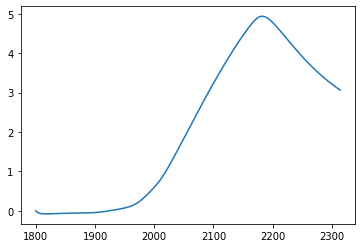

In [358]:
plt.plot(t+1800 , solutions[:,1])

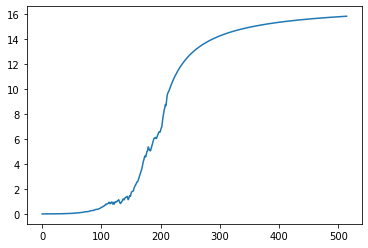

In [355]:
x = t 
y = [epsilon(x[i]) for i in range(x.shape[0])]
plt.plot(x, y)